In [2]:
# Jovian Commit Essentials
# Please retain and execute this cell without modifying the contents for `jovian.commit` to work
!pip install jovian --upgrade -q
import jovian
jovian.set_project('us-accident-analysis')
jovian.set_colab_id('1TK58GtiqGFqDpU9o1RL8zO-TOVXzfGCs')

     |████████████████████████████████| 68 kB 4.4 MB/s 


# us-accident-analysis

Use the "Run" button to execute the code.

In [3]:
!pip install jovian --upgrade --quiet

In [4]:
import jovian

In [5]:
# Execute this to save new versions of the notebook
jovian.commit(project="us_accident_analysis_")

[jovian] Detected Colab notebook...
[jovian] Please enter your API key ( from https://jovian.ai/ ):
API KEY: ··········
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/victoradejumo2/us-accident-analysis


'https://jovian.ai/victoradejumo2/us-accident-analysis'

In [6]:
!pip install opendatasets --quiet

In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [54]:
# download_url = 'https://www.kaggle.com/sobhanmoosavi/us-accidents'
# od.download(download_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: victoradejumo
Your Kaggle Key: ··········


100%|██████████| 117M/117M [00:02<00:00, 59.4MB/s]


In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [56]:
data = '/content/drive/MyDrive/Jovian/victoradejumo2 us-accident-analysis/us-accidents/US_Accidents_Dec20_updated.csv'
df_one = pd.read_csv(data, header = 0)
df_one.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-2716600,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.10891,-83.09286,40.11206,-83.03187,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,NaN,Outerbelt E,R,Dublin,Franklin,OH,43017,US,US/Eastern,KOSU,2016-02-08 00:53:00,42.1,36.1,58.0,29.76,10.0,SW,10.4,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2716601,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.86542,-84.06280,39.86501,-84.04873,0.747,At OH-4/OH-235/Exit 41 - Accident.,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
2,A-2716602,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10266,-84.52468,39.10209,-84.52396,0.055,At I-71/US-50/Exit 1 - Accident.,NaN,I-75 S,R,Cincinnati,Hamilton,OH,45203,US,US/Eastern,KLUK,2016-02-08 05:53:00,36.0,NaN,97.0,29.70,10.0,Calm,NaN,0.02,Overcast,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Night,Night,Day
3,A-2716603,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10148,-84.52341,39.09841,-84.52241,0.219,At I-71/US-50/Exit 1 - Accident.,NaN,US-50 E,R,Cincinnati,Hamilton,OH,45202,US,US/Eastern,KLUK,2016-02-08 05:53:00,36.0,NaN,97.0,29.70,10.0,Calm,NaN,0.02,Overcast,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Night,Night,Day
4,A-2716604,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.06213,-81.53784,41.06217,-81.53547,0.123,At Dart Ave/Exit 21 - Accident.,NaN,I-77 N,R,Akron,Summit,OH,44311,US,US/Eastern,KAKR,2016-02-08 06:54:00,39.0,NaN,55.0,29.65,10.0,Calm,NaN,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Day,Day


In [57]:
#Checking the columns
df_one.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [58]:
#Check the shape
df_one.shape

(1516064, 47)

In [59]:
#Check the information about the data
df_one.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1516064 entries, 0 to 1516063
Data columns (total 47 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   ID                     1516064 non-null  object 
 1   Severity               1516064 non-null  int64  
 2   Start_Time             1516064 non-null  object 
 3   End_Time               1516064 non-null  object 
 4   Start_Lat              1516064 non-null  float64
 5   Start_Lng              1516064 non-null  float64
 6   End_Lat                1516064 non-null  float64
 7   End_Lng                1516064 non-null  float64
 8   Distance(mi)           1516064 non-null  float64
 9   Description            1516064 non-null  object 
 10  Number                 469969 non-null   float64
 11  Street                 1516064 non-null  object 
 12  Side                   1516064 non-null  object 
 13  City                   1515981 non-null  object 
 14  County            

From above there are 3 dtypes: numbers, bools and objects

In [60]:
#Check the describtion of the numeric features
df_one.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,1.516064e+06,1.516064e+06,1.516064e+06,1.516064e+06,1.516064e+06,1.516064e+06,4.699690e+05,1.473031e+06,1.066748e+06,1.470555e+06,1.479790e+06,1.471853e+06,1.387202e+06,1.005515e+06
mean,2.238630e+00,3.690056e+01,-9.859919e+01,3.690061e+01,-9.859901e+01,5.872617e-01,8.907533e+03,5.958460e+01,5.510976e+01,6.465960e+01,2.955495e+01,9.131755e+00,7.630812e+00,8.477855e-03
std,6.081481e-01,5.165653e+00,1.849602e+01,5.165629e+00,1.849590e+01,1.632659e+00,2.242190e+04,1.827316e+01,2.112735e+01,2.325986e+01,1.016756e+00,2.889112e+00,5.637364e+00,1.293168e-01
min,1.000000e+00,2.457022e+01,-1.244976e+02,2.457011e+01,-1.244978e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.385422e+01,-1.182076e+02,3.385420e+01,-1.182077e+02,0.000000e+00,1.212000e+03,4.700000e+01,4.080000e+01,4.800000e+01,2.944000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.000000e+00,3.735113e+01,-9.438100e+01,3.735134e+01,-9.437987e+01,1.780000e-01,4.000000e+03,6.100000e+01,5.700000e+01,6.800000e+01,2.988000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.072593e+01,-8.087469e+01,4.072593e+01,-8.087449e+01,5.940000e-01,1.010000e+04,7.300000e+01,7.100000e+01,8.400000e+01,3.004000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.000000e+00,4.900058e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,1.551860e+02,9.999997e+06,1.706000e+02,1.130000e+02,1.000000e+02,5.804000e+01,1.400000e+02,9.840000e+02,2.400000e+01


In [61]:
#Checking for the number of each data type----
df_numeric = df_one.select_dtypes(include='number')
num = len(df_numeric.columns)
print(f'We have {num} numeric columns')

df_obj = df_one.select_dtypes(include='object')
num_2 = len(df_obj.columns)
print(f'we have {num_2} object columns')

df_bool = df_one.select_dtypes(include='bool')
num_3 = len(df_bool.columns)
print(f'we have {num_3} boolean columns')

print(f'With a total number of {num + num_2 + num_3} columns')

We have 14 numeric columns
we have 20 object columns
we have 13 boolean columns
With a total number of 47 columns


In [64]:
#Checking for the percentage of the missing data
percentage_of_missing_data = pd.DataFrame({'Percentage of Missing of Data':round((df_one.isnull().sum()/len(df_one.index)) * 100,2)})
percentage_of_missing_data = percentage_of_missing_data.sort_values(by='Percentage of Missing of Data',ascending=False)
percentage_of_missing_data.head()

,Percentage of Missing of Data
Number,69.00
Precipitation(in),33.68
Wind_Chill(F),29.64
Wind_Speed(mph),8.50
Humidity(%),3.00


69% of Number are missing. That means we can't really get any insight from it.
33.68% of Precipitation is missing. We can work with that. We will have to come up with a way to fill the missing data up. Precipitation can't be ignored.
We are just going to drop Number

In [65]:
df_obj.head()

,ID,Start_Time,End_Time,Description,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Wind_Direction,Weather_Condition,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-2716600,2016-02-08 00:37:08,2016-02-08 06:37:08,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,Outerbelt E,R,Dublin,Franklin,OH,43017,US,US/Eastern,KOSU,2016-02-08 00:53:00,SW,Light Rain,Night,Night,Night,Night
1,A-2716601,2016-02-08 05:56:20,2016-02-08 11:56:20,At OH-4/OH-235/Exit 41 - Accident.,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,Calm,Light Rain,Night,Night,Night,Night
2,A-2716602,2016-02-08 06:15:39,2016-02-08 12:15:39,At I-71/US-50/Exit 1 - Accident.,I-75 S,R,Cincinnati,Hamilton,OH,45203,US,US/Eastern,KLUK,2016-02-08 05:53:00,Calm,Overcast,Night,Night,Night,Day
3,A-2716603,2016-02-08 06:15:39,2016-02-08 12:15:39,At I-71/US-50/Exit 1 - Accident.,US-50 E,R,Cincinnati,Hamilton,OH,45202,US,US/Eastern,KLUK,2016-02-08 05:53:00,Calm,Overcast,Night,Night,Night,Day
4,A-2716604,2016-02-08 06:51:45,2016-02-08 12:51:45,At Dart Ave/Exit 21 - Accident.,I-77 N,R,Akron,Summit,OH,44311,US,US/Eastern,KAKR,2016-02-08 06:54:00,Calm,Overcast,Night,Night,Day,Day


Observations

Note that Date time(dtype) will have to change.
Note that categorical data(dtype) will have to change.
The Describtion is not going to be useful in this case. Drop it. ---That's because we are not working on a NLP project.
Street might not be necessary. Drop Street
The city, the county is located in the state. Let's stick to the state. Drop others

In [68]:
#Checking for the unique itmes in Counrty
df_one.Country.unique()

array(['US'], dtype=object)

In [70]:
#Checking to see the items in Side
print(df_one.Side.unique())
print(f'Total number of sides: {len(df_one.Side.unique())}')

['R' 'L']
Total number of sides: 2


From the observation above, we have no empty space.

In [72]:
#Checking to see the Airport Code
print(df_one.Airport_Code.unique())
print(f'The total number of Airport: {len(df_one.Airport_Code.unique())}')

['KOSU' 'KFFO' 'KLUK' ... 'KOZA' 'KAVK' 'KICR']
The total number of Airport: 1986


In [73]:
#Checking itmes in Timezones. Take note of categorical data
print(df_one.Timezone.unique())
print(f"Total number of Timezones is {len(df_one.Timezone.unique())}")

['US/Eastern' 'US/Pacific' nan 'US/Central' 'US/Mountain']
Total number of Timezones is 5


In [74]:
#Checking for items in Wind_Direction
print(df_one.Wind_Direction.unique())
print(f"Total number of Wind_Direction is {len(df_one.Wind_Direction.unique())}")

['SW' 'Calm' 'WSW' 'WNW' 'West' 'NNW' 'South' 'W' 'NW' 'North' 'SSE' 'SSW'
 'ESE' 'SE' nan 'East' 'Variable' 'NNE' 'NE' 'ENE' 'CALM' 'S' 'VAR' 'N'
 'E']
Total number of Wind_Direction is 25


In [75]:
#Checking for unique weather conditions
print(df_one.Weather_Condition.unique())
print(f'The total number of weather condition is {len(df_one.Weather_Condition.unique())}')

['Light Rain' 'Overcast' 'Mostly Cloudy' 'Snow' 'Light Snow' 'Cloudy' nan
 'Scattered Clouds' 'Clear' 'Partly Cloudy' 'Light Freezing Drizzle'
 'Light Drizzle' 'Haze' 'Rain' 'Heavy Rain' 'Fair' 'Drizzle' 'Fog'
 'Thunderstorms and Rain' 'Patches of Fog' 'Light Thunderstorms and Rain'
 'Mist' 'Rain Showers' 'Light Rain Showers' 'Heavy Drizzle' 'Smoke'
 'Light Freezing Fog' 'Light Freezing Rain' 'Blowing Snow'
 'Heavy Thunderstorms and Rain' 'Heavy Snow' 'Snow Grains' 'Squalls'
 'Light Fog' 'Shallow Fog' 'Thunderstorm' 'Light Ice Pellets' 'Thunder'
 'Thunder in the Vicinity' 'Fair / Windy' 'Light Rain with Thunder'
 'Heavy Thunderstorms and Snow' 'Light Snow Showers' 'Cloudy / Windy'
 'Ice Pellets' 'N/A Precipitation' 'Light Thunderstorms and Snow'
 'T-Storm' 'Rain / Windy' 'Wintry Mix' 'Partly Cloudy / Windy'
 'Heavy T-Storm' 'Sand' 'Light Rain / Windy' 'Widespread Dust'
 'Mostly Cloudy / Windy' 'Blowing Dust / Windy' 'Blowing Dust'
 'Volcanic Ash' 'Freezing Rain / Windy' 'Small Hail' 'W

In [76]:
#Checking for the number of states
print(df_one.State.unique())
print(f"The total number of recorded state: {len(df_one.State.unique())}")

['OH' 'IN' 'KY' 'WV' 'MI' 'PA' 'CA' 'NV' 'MN' 'TX' 'MO' 'CO' 'OK' 'LA'
 'KS' 'WI' 'IA' 'MS' 'NE' 'ND' 'WY' 'SD' 'MT' 'NM' 'AR' 'IL' 'NJ' 'GA'
 'FL' 'NY' 'CT' 'RI' 'SC' 'NC' 'MD' 'MA' 'TN' 'VA' 'DE' 'DC' 'ME' 'AL'
 'NH' 'VT' 'AZ' 'UT' 'ID' 'OR' 'WA']
The total number of recorded state: 49


In [78]:
#Checking for how they correlate---- Create a new dataframe to isolate the itmes 
twilight_corr = df_one[['Sunrise_Sunset','Civil_Twilight','Nautical_Twilight','Astronomical_Twilight']]
twilight_corr.head(5)

,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,Night,Night,Night,Night
1,Night,Night,Night,Night
2,Night,Night,Night,Day
3,Night,Night,Night,Day
4,Night,Night,Day,Day


In [80]:
#Getting dummies for each data point
twilight = pd.get_dummies(twilight_corr)
twilight

,Sunrise_Sunset_Day,Sunrise_Sunset_Night,Civil_Twilight_Day,Civil_Twilight_Night,Nautical_Twilight_Day,Nautical_Twilight_Night,Astronomical_Twilight_Day,Astronomical_Twilight_Night
0,0,1,0,1,0,1,0,1
1,0,1,0,1,0,1,0,1
2,0,1,0,1,0,1,1,0
3,0,1,0,1,0,1,1,0
4,0,1,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...
1516059,1,0,1,0,1,0,1,0
1516060,1,0,1,0,1,0,1,0
1516061,1,0,1,0,1,0,1,0
1516062,1,0,1,0,1,0,1,0


In [81]:
#Let's separate the day from night to have better grouping
twilight_day = twilight[['Sunrise_Sunset_Day','Civil_Twilight_Day','Nautical_Twilight_Day','Astronomical_Twilight_Day']]
twilight_day

,Sunrise_Sunset_Day,Civil_Twilight_Day,Nautical_Twilight_Day,Astronomical_Twilight_Day
0,0,0,0,0
1,0,0,0,0
2,0,0,0,1
3,0,0,0,1
4,0,0,1,1
...,...,...,...,...
1516059,1,1,1,1
1516060,1,1,1,1
1516061,1,1,1,1
1516062,1,1,1,1


In [82]:
twilight_night = twilight[['Sunrise_Sunset_Night','Civil_Twilight_Night','Nautical_Twilight_Night','Astronomical_Twilight_Night']]
twilight_night

,Sunrise_Sunset_Night,Civil_Twilight_Night,Nautical_Twilight_Night,Astronomical_Twilight_Night
0,1,1,1,1
1,1,1,1,1
2,1,1,1,0
3,1,1,1,0
4,1,1,0,0
...,...,...,...,...
1516059,0,0,0,0
1516060,0,0,0,0
1516061,0,0,0,0
1516062,0,0,0,0


In [83]:
#Checking for day correlation
twilight_day = twilight_day.corr()
twilight_day

,Sunrise_Sunset_Day,Civil_Twilight_Day,Nautical_Twilight_Day,Astronomical_Twilight_Day
Sunrise_Sunset_Day,1.000000,0.920361,0.835080,0.761063
Civil_Twilight_Day,0.920361,1.000000,0.907303,0.826919
Nautical_Twilight_Day,0.835080,0.907303,1.000000,0.911417
Astronomical_Twilight_Day,0.761063,0.826919,0.911417,1.000000


In [84]:
#Checking for night correlation
twilight_night = twilight_night.corr()
twilight_night

,Sunrise_Sunset_Night,Civil_Twilight_Night,Nautical_Twilight_Night,Astronomical_Twilight_Night
Sunrise_Sunset_Night,1.000000,0.920357,0.835069,0.761046
Civil_Twilight_Night,0.920357,1.000000,0.907296,0.826905
Nautical_Twilight_Night,0.835069,0.907296,1.000000,0.911408
Astronomical_Twilight_Night,0.761046,0.826905,0.911408,1.000000


From the above observation, both day and night items are highly correlated. This means there is a high level that they all predict each other. we can drop all except one that will be used in the analysis.

In [85]:
df_one.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [ ]:
#Drop Colums that needs to be dropped. 
df_one.drop(columns=['Number','Country','Description','City','Zipcode','Astronomical_Twilight','Civil_Twilight','Nautical_Twilight'],inplace=True)

We are dropping Number because more than 50% is missing
We are dropping country because the accidents all happened in the same Country
We are dropping Description because we are not working on a NLP project
We are dropping Zipcode because they rep each state
We are dropping Astronomical_Twilight, Civil_Twilight,Nautical_Twilight because they are highly correlated with sunrise_sunset.... We should use just onr of them. They predict each other

In [89]:
df_one.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Street,Side,County,State,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset
0,A-2716600,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.10891,-83.09286,40.11206,-83.03187,3.230,Outerbelt E,R,Franklin,OH,US/Eastern,KOSU,2016-02-08 00:53:00,42.1,36.1,58.0,29.76,10.0,SW,10.4,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night
1,A-2716601,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.86542,-84.06280,39.86501,-84.04873,0.747,I-70 E,R,Montgomery,OH,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night
2,A-2716602,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10266,-84.52468,39.10209,-84.52396,0.055,I-75 S,R,Hamilton,OH,US/Eastern,KLUK,2016-02-08 05:53:00,36.0,NaN,97.0,29.70,10.0,Calm,NaN,0.02,Overcast,False,False,False,False,True,False,False,False,False,False,False,False,False,Night
3,A-2716603,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10148,-84.52341,39.09841,-84.52241,0.219,US-50 E,R,Hamilton,OH,US/Eastern,KLUK,2016-02-08 05:53:00,36.0,NaN,97.0,29.70,10.0,Calm,NaN,0.02,Overcast,False,False,False,False,True,False,False,False,False,False,False,False,False,Night
4,A-2716604,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.06213,-81.53784,41.06217,-81.53547,0.123,I-77 N,R,Summit,OH,US/Eastern,KAKR,2016-02-08 06:54:00,39.0,NaN,55.0,29.65,10.0,Calm,NaN,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,Night


To make things easy, we are going to group into date, category, numeric and boolean. In Respect with ID

In [91]:
#For the Date DataFrame--- 
date_DataFrame = df_one[['ID','Start_Time','End_Time','Weather_Timestamp']]

#For the Numeric DataFrame---
number_DataFrame = df_one[['ID',
                       'Start_Lat',
                       'Start_Lng',
                       'End_Lat',
                       'End_Lng',
                       'Distance(mi)',
                       'Temperature(F)',
                       'Wind_Chill(F)',
                       'Humidity(%)',
                       'Pressure(in)',
                       'Visibility(mi)',
                       'Wind_Speed(mph)',
                       'Precipitation(in)']]

#The DataFrame for the Categorical Data
Cat_DataFrame = df_one[['ID','Side','State','Timezone','Wind_Direction','Weather_Condition','Severity']]

#The DataFrame for Boolean Data
bool_DataFrame = df_one[['ID',
                     'Amenity',
                     'Bump',
                     'Crossing',
                     'Give_Way',
                     'Junction',
                     'No_Exit',
                     'Railway',
                     'Roundabout',
                     'Station',
                     'Stop',
                     'Traffic_Calming',
                     'Traffic_Signal',
                     'Turning_Loop']]

In [92]:
date_DataFrame.head()

,ID,Start_Time,End_Time,Weather_Timestamp
0,A-2716600,2016-02-08 00:37:08,2016-02-08 06:37:08,2016-02-08 00:53:00
1,A-2716601,2016-02-08 05:56:20,2016-02-08 11:56:20,2016-02-08 05:58:00
2,A-2716602,2016-02-08 06:15:39,2016-02-08 12:15:39,2016-02-08 05:53:00
3,A-2716603,2016-02-08 06:15:39,2016-02-08 12:15:39,2016-02-08 05:53:00
4,A-2716604,2016-02-08 06:51:45,2016-02-08 12:51:45,2016-02-08 06:54:00


In [94]:
#change the date to standard datetime objects
date_DataFrame['Start_Time'] = pd.to_datetime(date_DataFrame['Start_Time'], format='%Y-%m-%d')
date_DataFrame['End_Time'] = pd.to_datetime(date_DataFrame['End_Time'], format='%Y-%m-%d')
date_DataFrame['Weather_Timestamp'] = pd.to_datetime(date_DataFrame['Weather_Timestamp'], format='%Y-%m-%d')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [97]:
#Creating the year, month, day from the date dataframe
date_DataFrame['Year'] = date_DataFrame['Start_Time'].dt.year 
date_DataFrame['Month'] = date_DataFrame['Start_Time'].dt.month
date_DataFrame['Day'] = date_DataFrame['Start_Time'].dt.day
date_DataFrame['sTime'] = date_DataFrame['Start_Time'].dt.time
date_DataFrame['eTime'] = date_DataFrame['End_Time'].dt.time
date_DataFrame['wTime'] = date_DataFrame['Weather_Timestamp'].dt.time

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [98]:
date_DataFrame.head()

,ID,Start_Time,End_Time,Weather_Timestamp,Year,Month,Day,sTime,eTime,wTime
0,A-2716600,2016-02-08 00:37:08,2016-02-08 06:37:08,2016-02-08 00:53:00,2016,2,8,00:37:08,06:37:08,00:53:00
1,A-2716601,2016-02-08 05:56:20,2016-02-08 11:56:20,2016-02-08 05:58:00,2016,2,8,05:56:20,11:56:20,05:58:00
2,A-2716602,2016-02-08 06:15:39,2016-02-08 12:15:39,2016-02-08 05:53:00,2016,2,8,06:15:39,12:15:39,05:53:00
3,A-2716603,2016-02-08 06:15:39,2016-02-08 12:15:39,2016-02-08 05:53:00,2016,2,8,06:15:39,12:15:39,05:53:00
4,A-2716604,2016-02-08 06:51:45,2016-02-08 12:51:45,2016-02-08 06:54:00,2016,2,8,06:51:45,12:51:45,06:54:00


In [99]:
#We have extracted the necessary items from thoes date. We can now drop what we might not need
date_DataFrame.drop(columns=['Start_Time','End_Time','Weather_Timestamp','sTime','eTime','wTime'], inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [100]:
date_DataFrame.head()

,ID,Year,Month,Day
0,A-2716600,2016,2,8
1,A-2716601,2016,2,8
2,A-2716602,2016,2,8
3,A-2716603,2016,2,8
4,A-2716604,2016,2,8


In [102]:
#Year with the highest number of Accidents
accidents_by_year = pd.DataFrame(date_DataFrame.groupby('Year')['ID'].count())
accidents_by_year.reset_index(inplace=True)
accidents_by_year.head

<bound method NDFrame.head of    Year      ID
0  2016  129325
1  2017  170099
2  2018  166936
3  2019  261772
4  2020  787932>

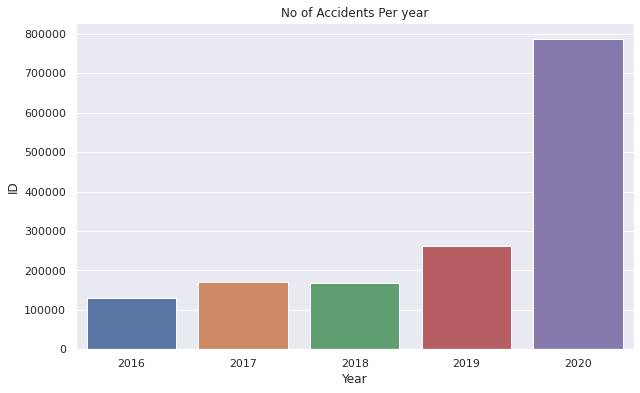

In [105]:
plt.figure(figsize=(10,6))
sns.barplot(data=accidents_by_year, x='Year', y='ID')
plt.title("No of Accidents Per year")

plt.show()

In [107]:
#Months with the highest number of Accidents
accidents_by_months = pd.DataFrame(date_DataFrame.groupby('Month')['ID'].count())
accidents_by_months.reset_index(inplace=True)
accidents_by_months

,Month,ID
0,1,88540
1,2,82419
2,3,96802
3,4,107007
4,5,108195
5,6,113048
6,7,53650
7,8,62903
8,9,122906
9,10,181074


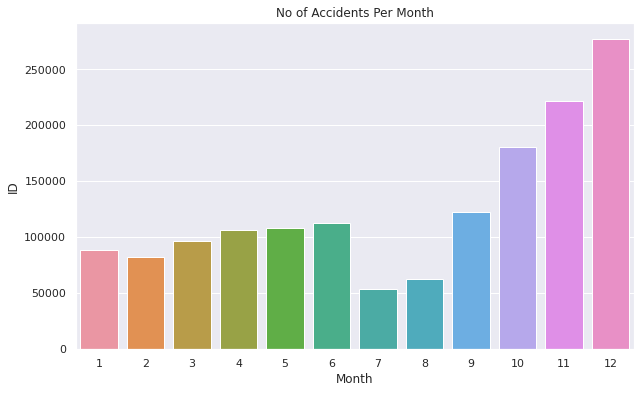

In [109]:
plt.figure(figsize=(10,6))
sns.barplot(data=accidents_by_months, x='Month', y='ID')
plt.title("No of Accidents Per Month")

plt.show()

From the above analysis, 2020 has the highest accidents and most accidents happen in December

In [110]:
#Exploring the categorical data
Cat_DataFrame.head()

,ID,Side,State,Timezone,Wind_Direction,Weather_Condition,Severity
0,A-2716600,R,OH,US/Eastern,SW,Light Rain,3
1,A-2716601,R,OH,US/Eastern,Calm,Light Rain,2
2,A-2716602,R,OH,US/Eastern,Calm,Overcast,2
3,A-2716603,R,OH,US/Eastern,Calm,Overcast,2
4,A-2716604,R,OH,US/Eastern,Calm,Overcast,2


In [111]:
Cat_DataFrame['Side'] = Cat_DataFrame.Side.astype('category')
Cat_DataFrame['State'] = Cat_DataFrame.State.astype('category')
Cat_DataFrame['Timezone'] = Cat_DataFrame.Timezone.astype('category')
Cat_DataFrame['Wind_Direction'] = Cat_DataFrame.Wind_Direction.astype('category')
Cat_DataFrame['Weather_Condition'] = Cat_DataFrame.Weather_Condition.astype('category')
Cat_DataFrame['Severity'] = Cat_DataFrame.Severity.astype('category')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [112]:
Cat_DataFrame.dtypes

ID                     object
Side                 category
State                category
Timezone             category
Wind_Direction       category
Weather_Condition    category
Severity             category
dtype: object

In [113]:
Cat_DataFrame.shape

(1516064, 7)

In [114]:
Cat_DataFrame.Side.unique()

['R', 'L']
Categories (2, object): ['R', 'L']

In [116]:
accidents_by_side = pd.DataFrame(Cat_DataFrame.groupby('Side')['ID'].count())
accidents_by_side.reset_index(inplace=True)

accidents_by_side['Percentage %'] = round((accidents_by_side['ID']/accidents_by_side['ID'].sum()) * 100,2)
accidents_by_side

,Side,ID,Percentage %
0,L,221502,14.61
1,R,1294562,85.39


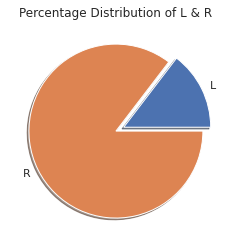

In [125]:
#define data
l_part = len(Cat_DataFrame["Side"][Cat_DataFrame.Side == 'L'])
R_part = len(Cat_DataFrame["Side"][Cat_DataFrame.Side == 'R'])

arr = np.array([l_part, R_part])
labels = ['L', 'R']

plt.pie(arr, labels=labels, explode=[0.1,0.0], shadow=True)
plt.title("Percentage Distribution of L & R")
plt.show()

In [127]:
accidents_by_states = pd.DataFrame(Cat_DataFrame.groupby('State')['ID'].count())
accidents_by_states.reset_index(inplace=True)
accidents_by_states['Percentage %'] = round((accidents_by_states['ID']/accidents_by_states['ID'].sum()) *100,2)
accidents_by_states = accidents_by_states.sort_values(by='ID',ascending=False)
accidents_by_states

,State,ID,Percentage %
3,CA,448833,29.61
8,FL,153007,10.09
35,OR,87484,5.77
41,TX,75142,4.96
32,NY,60974,4.02
21,MN,52345,3.45
43,VA,51198,3.38
25,NC,50159,3.31
36,PA,42844,2.83
12,IL,41709,2.75


The State with the highest number of accidents is CA

In [128]:
#accident according to timezone
accidents_by_tz = pd.DataFrame(Cat_DataFrame.groupby('Timezone')['ID'].count())
accidents_by_tz.reset_index(inplace=True)
accidents_by_tz['Percentage %'] = round((accidents_by_tz['ID']/accidents_by_tz['ID'].sum()) *100,2)
accidents_by_tz

,Timezone,ID,Percentage %
0,US/Central,265204,17.52
1,US/Eastern,587961,38.84
2,US/Mountain,96239,6.36
3,US/Pacific,564358,37.28


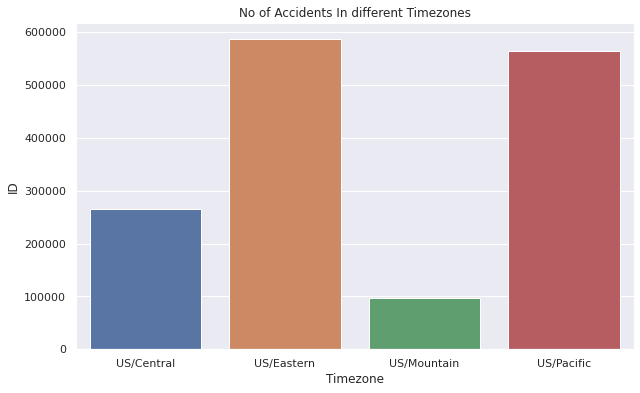

In [129]:
plt.figure(figsize=(10,6))
sns.barplot(data=accidents_by_tz, x='Timezone', y='ID')
plt.title("No of Accidents In different Timezones")

plt.show()

In [131]:
accidents_by_wd = pd.DataFrame(Cat_DataFrame.groupby('Wind_Direction')['ID'].count())
accidents_by_wd.reset_index()

accidents_by_wd['Percentage'] = round(accidents_by_wd.ID / accidents_by_wd.ID.sum() * 100, 2)
accidents_by_wd.sort_values(by='ID', ascending= False, inplace=True)
accidents_by_wd

,ID,Percentage
Wind_Direction,,
CALM,202870,13.76
Calm,79192,5.37
WNW,77743,5.27
NW,75810,5.14
W,72059,4.89
SSW,69901,4.74
WSW,68504,4.65
NNW,68014,4.61
S,67543,4.58


In [132]:
accidents_by_wc = pd.DataFrame(Cat_DataFrame.groupby('Weather_Condition')['ID'].count())
accidents_by_wc.reset_index()

,Weather_Condition,ID
0,Blowing Dust,78
1,Blowing Dust / Windy,79
2,Blowing Snow,144
3,Blowing Snow / Windy,63
4,Clear,180223
...,...,...
111,Tornado,2
112,Volcanic Ash,4
113,Widespread Dust,43
114,Wintry Mix,1251


In [133]:
accidents_by_wc['Percentage'] = round(accidents_by_wc.ID / accidents_by_wc.ID.sum() * 100, 2)

In [134]:
accidents_by_wc.sort_values(by='ID', ascending=False)

,ID,Percentage
Weather_Condition,,
Fair,465252,31.61
Mostly Cloudy,193595,13.15
Clear,180223,12.24
Cloudy,161291,10.96
Partly Cloudy,133102,9.04
...,...,...
Sleet / Windy,1,0.00
Light Fog,1,0.00
Low Drifting Snow,1,0.00


For some reasons, most accident occurs when the weather condition is Fair and clear.... People are more careful when it's cloudy and when there's some sort of issue with the weather.

In [135]:
#Number category
number_DataFrame.head(5)

,ID,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
0,A-2716600,40.10891,-83.09286,40.11206,-83.03187,3.230,42.1,36.1,58.0,29.76,10.0,10.4,0.00
1,A-2716601,39.86542,-84.06280,39.86501,-84.04873,0.747,36.9,NaN,91.0,29.68,10.0,NaN,0.02
2,A-2716602,39.10266,-84.52468,39.10209,-84.52396,0.055,36.0,NaN,97.0,29.70,10.0,NaN,0.02
3,A-2716603,39.10148,-84.52341,39.09841,-84.52241,0.219,36.0,NaN,97.0,29.70,10.0,NaN,0.02
4,A-2716604,41.06213,-81.53784,41.06217,-81.53547,0.123,39.0,NaN,55.0,29.65,10.0,NaN,NaN


In [139]:
number_DataFrame.index

RangeIndex(start=0, stop=1516064, step=1)

In [136]:
num_per = pd.DataFrame({"Percentage of Missing Data":round(number_DataFrame.isnull().sum()/len(number_DataFrame.index) * 100, 2)})
num_per

,Percentage of Missing Data
ID,0.00
Start_Lat,0.00
Start_Lng,0.00
End_Lat,0.00
End_Lng,0.00
Distance(mi),0.00
Temperature(F),2.84
Wind_Chill(F),29.64
Humidity(%),3.00
Pressure(in),2.39


In [140]:
number_DataFrame['Distance(mi)'].max()

155.186

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


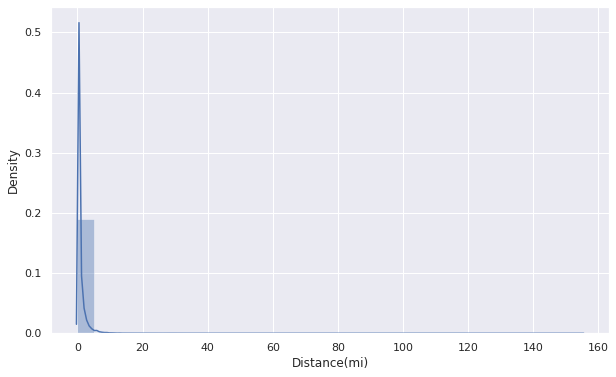

In [141]:
plt.figure(figsize=(10,6))
sns.distplot(a=number_DataFrame['Distance(mi)'], bins=30)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


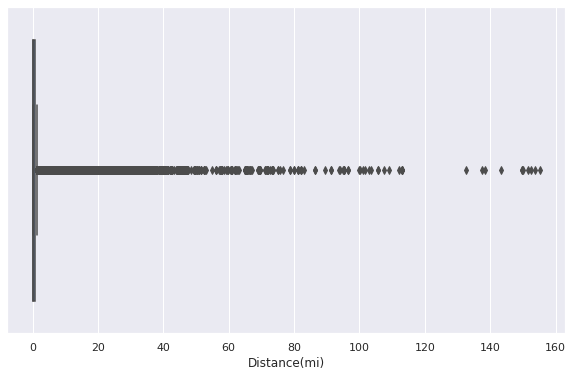

In [142]:
plt.figure(figsize=(10,6))
sns.boxplot(number_DataFrame['Distance(mi)'])
plt.show()

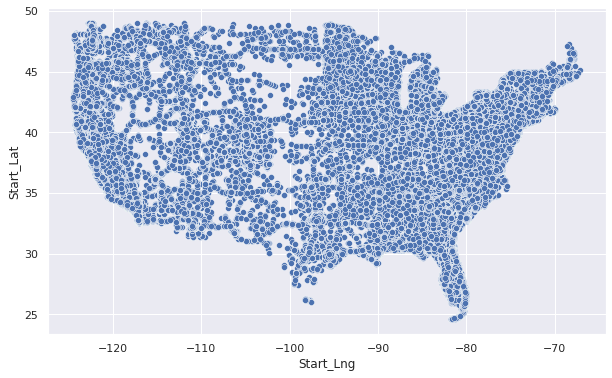

In [143]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=number_DataFrame.Start_Lng, y=number_DataFrame.Start_Lat)
plt.show()

In [144]:
print("The min temperature is ", number_DataFrame['Temperature(F)'].min())
print("The median temperature is ", number_DataFrame['Temperature(F)'].median())
print("The max temperature is ", number_DataFrame['Temperature(F)'].max())

The min temperature is  -89.0
The median temperature is  61.0
The max temperature is  170.6


In [146]:
temp = number_DataFrame[['ID','Temperature(F)']]
temp.head(5)

,ID,Temperature(F)
0,A-2716600,42.1
1,A-2716601,36.9
2,A-2716602,36.0
3,A-2716603,36.0
4,A-2716604,39.0


In [147]:
temp['Temperature(F)'].fillna(temp['Temperature(F)'].mean())

0          42.1
1          36.9
2          36.0
3          36.0
4          39.0
           ... 
1516059    86.0
1516060    70.0
1516061    73.0
1516062    71.0
1516063    79.0
Name: Temperature(F), Length: 1516064, dtype: float64

In [148]:
#A function that shares the tempreture into different category. 
def get_cat(x, low = -89.0, mid=63.0 ):
  if x >= low and x <= 0:
    return "Very Cold"
  elif x > 0 and x <= mid:
    return "Cold"
  elif x > mid and x <= 140:
    return "Warm"
  else:
    return "Very Warm" 

In [151]:
#Applying the function
temp['Cat'] = temp['Temperature(F)'].apply(get_cat)
temp

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,ID,Temperature(F),Cat
0,A-2716600,42.1,Cold
1,A-2716601,36.9,Cold
2,A-2716602,36.0,Cold
3,A-2716603,36.0,Cold
4,A-2716604,39.0,Cold
...,...,...,...
1516059,A-4239402,86.0,Warm
1516060,A-4239403,70.0,Warm
1516061,A-4239404,73.0,Warm
1516062,A-4239405,71.0,Warm


In [152]:
Temp = pd.DataFrame(temp.groupby('Cat')['ID'].count())

In [153]:
Temp.reset_index(inplace=True)

In [155]:
Temp['Percent'] = round(Temp.ID / Temp.ID.sum() * 100, 2)
Temp

,Cat,ID,Percent
0,Cold,817862,53.95
1,Very Cold,3132,0.21
2,Very Warm,43035,2.84
3,Warm,652035,43.01


In [156]:
jovian.commit(project="us_accident_analysis")

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/victoradejumo2/us-accident-analysis


'https://jovian.ai/victoradejumo2/us-accident-analysis'